In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)


In [16]:
# View all of the classes that automap found
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent[0])

2017-08-23


2016-08-23


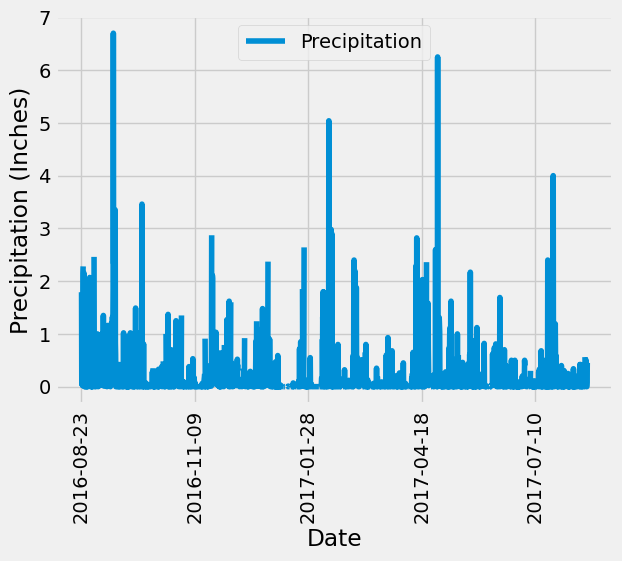

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import datetime as dt
# Calculate the date one year from the last date in data set.
last_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_date)

# Perform a query to retrieve the data and precipitation scores
select = [measurement.date, measurement.prcp]
result = session.query(*select).filter(measurement.date >= last_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(result, columns=["Date","Precipitation"]).set_index('Date')

# Sort the dataframe by date
precipitation_df.sort_values(by='Date',ascending=True,inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot()
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.xticks(rotation=90)
plt.show()



In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number stations in the dataset
session.query(station).group_by(station.station).count()

9

In [34]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active = [measurement.station, func.count(measurement.id)]
station_nums = session.query(*active).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()
station_nums

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()

high = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()

average = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()

print(f"The lowest observed temperature is: {low}")
print(f"The highest observed temperature is: {high}")
print(f"The average observed temperature is: {average}")


The lowest observed temperature is: [(54.0,)]
The highest observed temperature is: [(85.0,)]
The average observed temperature is: [(71.66378066378067,)]


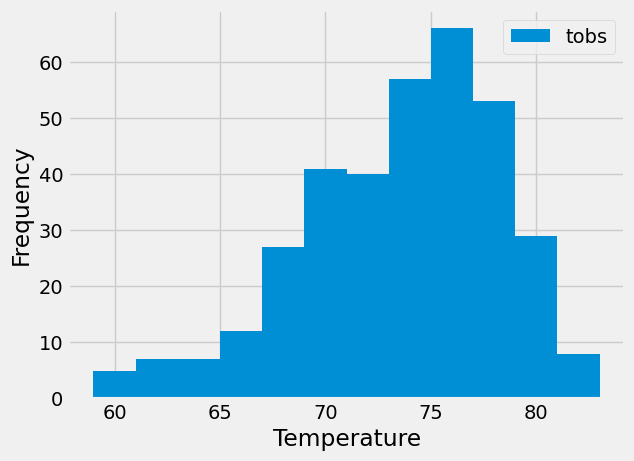

In [48]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_obs = session.query(measurement.tobs).\
    filter(measurement.station == station_nums[0][0]).\
    filter(measurement.date >= last_date).all()
temperature_obs = list(np.ravel(station_obs))
temperature_obs

# starting my query
station_q = [station.station,station.name,station.latitude,station.longitude,station.elevation]
queryresult = session.query(*station_q).all()
stations_desc = pd.DataFrame(queryresult, columns=['Station','Name','Latitude','Longitude','Elevation'])

station_loc = stations_desc.loc[stations_desc["Station"] == station_nums[0][0],"Name"].tolist()[0]

# n, bins, patches = plt.hist(temperatures, bins=12,alpha=0.7, rwidth=1.0,label='tobs')
plt.hist(temperature_obs, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(["tobs"])
plt.show()

# Close session

In [ ]:
# Close Session
session.close()